In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from wrf import getvar, latlon_coords

# Load WRF Output Files
ncfile1 = Dataset("/Volumes/Ann/wrf_100%/wrfout_d01_2008-03-06_12:00:00")
ncfile2 = Dataset("/Volumes/Ann/wrf_50%/wrfout_d01_2008-03-06_12:00:00")
ncfile3 = Dataset("/Volumes/Ann/wrf_75%/wrfout_d01_2008-03-06_12:00:00")

#Load Domain 2 and Domain 3 Boundary file for domain marking
ncfile1a = Dataset("/Volumes/Ann/wrf_75%/wrfout_d02_2008-03-06_18:00:00")  
ncfile1b = Dataset("/Volumes/Ann/wrf_75%/wrfout_d03_2008-03-06_18:00:00")

# Function to extract terrain and coordinates
def extract_terrain(ncfile):
    terrain = getvar(ncfile, "ter", timeidx=-1)
    lats, lons = latlon_coords(terrain)
    return terrain, lats, lons

terrain1, lat1, lon1 = extract_terrain(ncfile1)
terrain2, lat2, lon2 = extract_terrain(ncfile2)
terrain3, lat3, lon3 = extract_terrain(ncfile3)
terrain1a, lat1a, lon1a = extract_terrain(ncfile1a)
terrain1b, lat1b, lon1b = extract_terrain(ncfile1b)

# Function to extract domain boundary coordinates
''' lats[0, :] : Top row (northern edge)
All longitudes at the first row (lat fixed, lon varies left → right)

lats[:, -1]: Right column (eastern edge)
All latitudes at the last column (lon fixed, lat varies top → bottom)

lats[-1, ::-1]: Bottom row (southern edge), reversed
All longitudes at the last row, from right → left (to follow the polygon clockwise)

lats[::-1, 0]: Left column (western edge), reversed
All latitudes at the first column, from bottom → top'''

def extract_domain_boundary(ncfile):
    _, lats, lons = extract_terrain(ncfile)
    lat_bounds = np.concatenate([lats[0, :], lats[:, -1], lats[-1, ::-1], lats[::-1, 0]])
    lon_bounds = np.concatenate([lons[0, :], lons[:, -1], lons[-1, ::-1], lons[::-1, 0]])
    return lat_bounds, lon_bounds

lat_bounds1a, lon_bounds1a = extract_domain_boundary(ncfile1a)
lat_bounds1b, lon_bounds1b = extract_domain_boundary(ncfile1b)

cmap_reversed = plt.get_cmap('Spectral_r')
# Function to plot terrain with domain boundaries
levels = np.arange(0, 3500, 100)
def plot_terrain(ax, terrain, lat, lon, title, vmin=None, vmax=None, levels=levels, extend= 'Both'):
    ax.set_title(title, fontsize=10)
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')
    
    # Ensure all plots have the same color range
    contour = ax.contourf(lon, lat, terrain, cmap=cmap_reversed, transform=ccrs.PlateCarree(), 
                          vmin=0, vmax=3000, levels=levels,extend='both')
    return contour

# Define cross-section line 1
lonx, latx = -98.83, 27.22  # Start point
lony, laty = -96.74, 28.94  # End point

# Define cross-section line 2
lonx1, latx1 = -106.51, 31.84 # Start point
lony1, laty1 = -96.70, 28.89 # End point

# Locations for stations
locations = {
    "HEB": (27.30, -98.70),
    "BEV": (28.39, -97.740),
    "VCT": (28.822003, -96.983117),
    "SGR": (29.596031, -95.640973),
    "LCH": (30.1692, -93.2961),
    "LFT": (30.1442, -92.0996),
    "JAN": (32.2152, -90.3202),
    "GWO": (33.474, -90.2345)
}

In [ ]:
# print he maximum and minimum values of the terrain for all domains
max_height = np.max(terrain1)
min_height = np.min(terrain1)
print(f"Max height1: {np.max(terrain1)} m")
print(f"Max height2: {np.max(terrain2)} m")
print(f"Max height3: {np.max(terrain3)} m")

Max height1: <xarray.DataArray 'terrain' ()> Size: 4B
array(3633.3293, dtype=float32)
Coordinates:
    XTIME    float32 4B 0.0
    Time     datetime64[ns] 8B 2008-03-06T12:00:00 m
Max height2: <xarray.DataArray 'terrain' ()> Size: 4B
array(1816.6647, dtype=float32)
Coordinates:
    XTIME    float32 4B 0.0
    Time     datetime64[ns] 8B 2008-03-06T12:00:00 m
Max height3: <xarray.DataArray 'terrain' ()> Size: 4B
array(454.16617, dtype=float32)
Coordinates:
    XTIME    float32 4B 0.0
    Time     datetime64[ns] 8B 2008-03-06T12:00:00 m


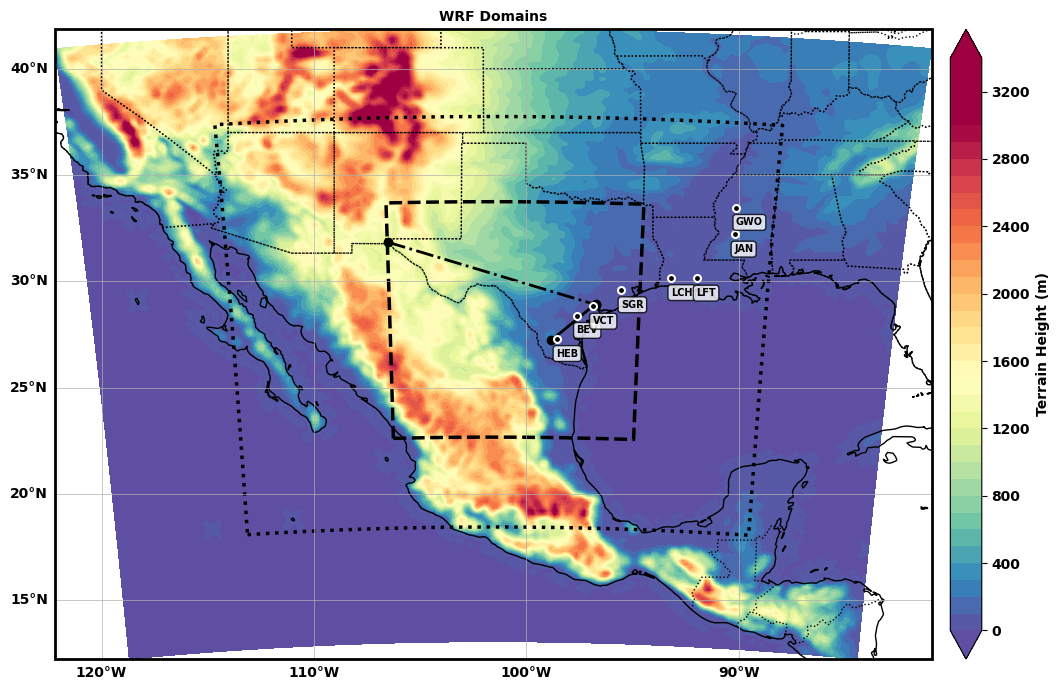

In [ ]:
# Define color limits based on the actual terrain range
levels = np.arange(0, 3500, 100)  
fig, axes = plt.subplots(figsize=(21, 7), subplot_kw={'projection': ccrs.PlateCarree()})
contour1 = plot_terrain(axes, terrain1, lat1, lon1, "WRF Domains", levels=levels, extend= 'Both')
axes.plot(lon_bounds1a, lat_bounds1a, color='black',linestyle=":", linewidth=2.5, transform=ccrs.PlateCarree())
axes.plot(lon_bounds1b, lat_bounds1b, color='black',linestyle = 'dashed', linewidth=2.5, transform=ccrs.PlateCarree())
axes.plot([lonx, lony], [latx, laty], color='black', linewidth=2, marker='o',transform=ccrs.Geodetic(), label='Transect Line')
axes.plot([lonx1, lony1], [latx1, laty1], color='black', linewidth=2, marker='o',  linestyle='-.', transform=ccrs.Geodetic(), label='Transect Line')
cbar = plt.colorbar(contour1, orientation='vertical',extend='both',pad=0.01)  # Correctly extending
cbar.set_label("Terrain Height (m)")

for spine in axes.spines.values():
        spine.set_linewidth(2)
        
# Add gridlines with labels on the left and bottom only
gl = axes.gridlines(draw_labels=True, linewidth=0.5, linestyle="-")
gl.right_labels = False
gl.top_labels = False

# Plot locations
for location, (lat_city, lon_city) in locations.items():
        # Plot markers (white filled, black border)
        axes.plot(lon_city + 0.12, lat_city, marker='o', markeredgecolor='white', markeredgewidth=1.5, 
                color='black', markersize=5, transform=ccrs.PlateCarree())

        # Add text labels with a background for better readability
        axes.text(lon_city + 0.1, lat_city - 0.7, location, transform=ccrs.PlateCarree(),
                ha='left', va='center', fontsize=7, color='black',
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.8, boxstyle='round,pad=0.3'))
        
# Update rcParams for consistent styling (affects all plots)
plt.rcParams.update({
'font.size': 10,
'font.weight': 'bold',
'axes.labelsize': 10,
'axes.labelweight': 'bold',
'axes.titlesize': 14,
'axes.titleweight': 'bold'
})

plt.tight_layout()
# Adjust layout to fit colorbar
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Shrinks main plots to leave space for colorbar
plt.show()


3D coastlines

Cartopy + Matplotlib to manually draw 3D coastlines by extracting geometry data from Cartopy's Natural Earth feature and plotting them as line segments.

- When you're using 3D plotting (ax.plot3D) and Cartopy's standard coastlines won't render
- To manually extract geometry and control how coastlines appear in non-standard projections
- For full customization or when plotting coastlines as part of a terrain/height visualization

STEPS
  - Each geom defines a segment of coastline (or multiple segments) : geographic geometries : Retrieves all raw shapely geometries
  - geos_to_path(geom) : Converts a Shapely geometry into one or more Matplotlib Path objects. Each path is made of:
    - A sequence of vertices (x, y points)
    - A set of commands (like MOVETO, LINETO, CLOSEPOLY) that tell how to connect those vertices
  -  itertool: list of paths for each geometry -- > one flat list of all paths
  - Segments: This extracts the (x, y) coordinates from each Matplotlib Path object in the paths list, and stores them as NumPy arrays for later plotting — such as drawing coastlines.
  - This step turns each geographic Path into clean, ready-to-plot (x, y) line segments.



In [ ]:
import itertools
from matplotlib.collections import LineCollection
from cartopy.mpl.patch import geos_to_path

# Define projection
target_projection = ccrs.PlateCarree()
# Load Natural Earth coastline feature
feature = cfeature.NaturalEarthFeature('physical', 'coastline', '110m')
geoms = feature.geometries() 
# Convert geometries to the target projection
geoms = [target_projection.project_geometry(geom, feature.crs) for geom in geoms]
# Extract paths from geometries
coast_paths = list(itertools.chain.from_iterable(geos_to_path(geom) for geom in geoms))

# Convert paths into segments for LineCollection
segments = []
for path in coast_paths:
    vertices = [vertex for vertex, _ in path.iter_segments()]
    vertices = np.asarray(vertices)
    segments.append(vertices)

Alternative ways of setting up 3D images: 
- Using plt.figure() + add_subplot(): fig = plt.figure(figsize=(10, 5)); 
ax1 = fig.add_subplot(1, 3, 1, projection='3d')  
- Using plt.subplots() with subplot_kw: fig, ax1 = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8, 6))


/var/folders/rd/20pn3tk11j93kyzv8nw3djch0000gn/T/ipykernel_96876/1957367124.py:74: UserWarning: Adding colorbar to a different Figure <Figure size 2100x700 with 2 Axes> than <Figure size 1800x500 with 4 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(contour1, cax=cbar_ax, orientation='vertical', extend='both', shrink=0.9,fraction=0.02, pad=0.07)
/var/folders/rd/20pn3tk11j93kyzv8nw3djch0000gn/T/ipykernel_96876/1957367124.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


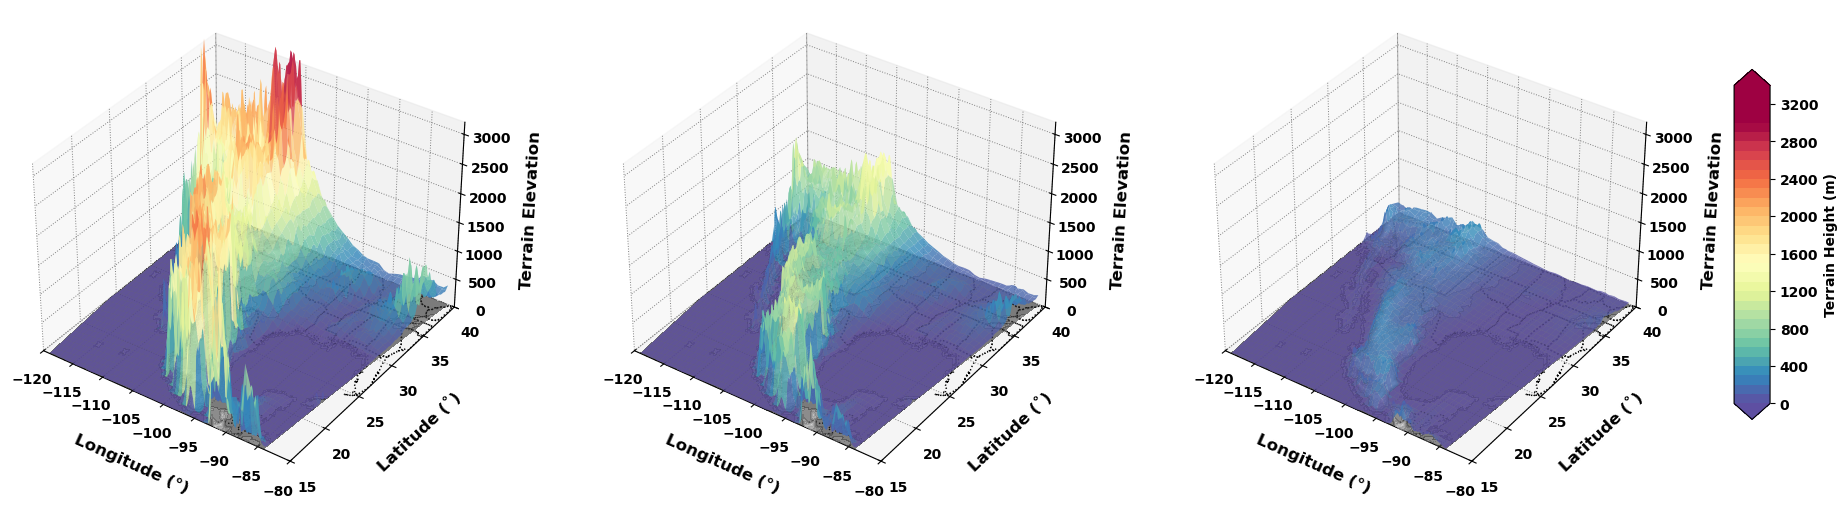

In [ ]:
# Define limits
lat_min, lat_max = 15, 40
lon_min, lon_max = -120, -80

# Apply mask to filter out-of-bound terrain values for each dataset
mask = (lat2 >= lat_min) & (lat2 <= lat_max) & (lon2 >= lon_min) & (lon2 <= lon_max)
terrain_A_filtered = np.where(mask, terrain1, np.nan)
terrain_B_filtered = np.where(mask, terrain2, np.nan)
terrain_C_filtered = np.where(mask, terrain3, np.nan)

# Figure with three 3D subplots
fig = plt.figure(figsize=(18, 5))
fig.subplots_adjust(top=0.80)
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

# For demonstration, create a function that plots terrain and additional features on an axis.
def plot_terrain(ax, terrain_filtered, title=""):
    # Plot terrain surface
    surf = ax.plot_surface(lon2, lat2, terrain_filtered, cmap='Spectral_r', 
                           edgecolor='none', alpha=0.8)
    surf.set_clim(0, 3200)
    
    # Plot contour at z=0 to avoid the surface being hidden
    ax.contourf(lon2, lat2, terrain_filtered, zdir='z', offset=0, 
                cmap='gray', alpha=0.6)
    
    # Plot coastlines, borders & state lines
    for feature, linestyle in [(cfeature.BORDERS, ':'), (cfeature.STATES, ':')]:
        geom_list = list(feature.geometries())
        for geom in geom_list:
            geom_proj = target_projection.project_geometry(geom, feature.crs)
            paths = geos_to_path(geom_proj)
            for path in paths:
                vertices = np.asarray([vertex for vertex, _ in path.iter_segments()])
                mask = (vertices[:, 1] >= lat_min) & (vertices[:, 1] <= lat_max) & \
                       (vertices[:, 0] >= lon_min) & (vertices[:, 0] <= lon_max)
                if np.any(mask):
                    ax.plot3D(vertices[mask, 0], vertices[mask, 1], 
                              np.zeros_like(vertices[mask, 0]), 'k', 
                              linestyle=linestyle, linewidth=1)
    
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)
    ax.set_zlim(0, 3200)
    ax.view_init(elev=35, azim=-55)
    return surf  

for ax in axes:
    ax.set_xlabel("Longitude (°)", fontsize=12, labelpad=10, fontweight='bold')
    ax.set_ylabel("Latitude (˚)", fontsize=12, labelpad=10, fontweight='bold')
    ax.set_zlabel("Terrain Elevation", fontsize=12, labelpad=10, fontweight='bold')
    ax.grid(True)
    for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
        axis._axinfo["grid"].update({
            "linewidth": 0.7,
            "color": "gray",
            "linestyle": ":",
        })

# Plot each terrain on its respective subplot
surf1 = plot_terrain(ax1, terrain_A_filtered, title='CTRL Run')
surf2 = plot_terrain(ax2, terrain_B_filtered, title='50% Smoothened Run')
surf3 = plot_terrain(ax3, terrain_C_filtered, title='75% Smoothened Run')

# Leave some room on the right side of the figure
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.999, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = plt.colorbar(contour1, cax=cbar_ax, orientation='vertical', extend='both', shrink=0.9,fraction=0.02, pad=0.07)  
cbar.set_label("Terrain Height (m)")
plt.tight_layout()
plt.show()
